In [100]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
plt.style.use('fivethirtyeight') 

%matplotlib inline
from pylab import rcParams
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
from fbprophet import Prophet
import math
from sklearn.metrics import mean_squared_error
from random import random
import datetime

In [101]:
# Load the data and Preprocessing
df = pd.read_excel('concat_raw_o2.xlsx')
df[['DATE', 'DAY_OF_WEEK']] = df['DATE'].str.split(' ', n=1, expand=True)
df['DATE'] = pd.to_datetime(df['DATE'])
df = df.sort_values('DATE')
df.set_index('DATE', inplace=True)
df = df['2016-01-01':'2019-08-04']
df = df.loc[df['IND REV'] >=0]
df = df.loc[~df.index.duplicated(keep='first')]

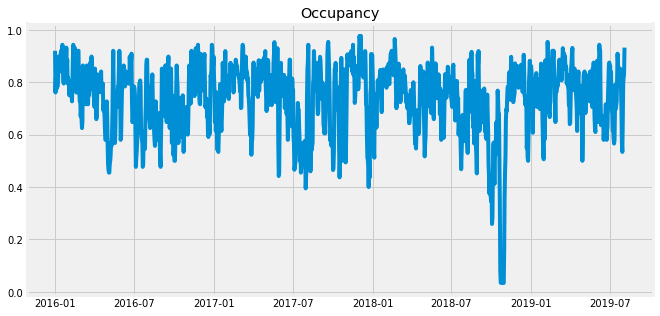

In [102]:
# Visualize
plt.figure(figsize=(10, 5))
plt.plot(df['OCC %'])
plt.title('Occupancy')
plt.grid(True)
plt.show();

To be able to compare easily, we will forecast the last 60 days occupancy for every model.

## Autoregression (AR)

This method is suitable for univariate time series without trend and seasonal components.

In [103]:
X = df['OCC %']
X = X.values
train, test = X[0:len(X)-60], X[len(X)-60:]

predicted=0.685405, expected=0.818000
predicted=0.862120, expected=0.943000
predicted=0.950587, expected=0.920000
predicted=0.865509, expected=0.920000
predicted=0.829317, expected=0.727000
predicted=0.673094, expected=0.636000
predicted=0.641483, expected=0.670000
predicted=0.732552, expected=0.670000
predicted=0.732261, expected=0.670000
predicted=0.705393, expected=0.659000
predicted=0.646432, expected=0.670000
predicted=0.628671, expected=0.580000
predicted=0.575132, expected=0.614000
predicted=0.624070, expected=0.625000
predicted=0.677239, expected=0.636000
predicted=0.713582, expected=0.682000
predicted=0.719312, expected=0.716000
predicted=0.721037, expected=0.644000
predicted=0.617129, expected=0.580000
predicted=0.562606, expected=0.614000
predicted=0.624307, expected=0.632000
predicted=0.679442, expected=0.747000
predicted=0.798781, expected=0.802000
predicted=0.795645, expected=0.864000
predicted=0.832447, expected=0.875000
predicted=0.823277, expected=0.852000
predicted=0.

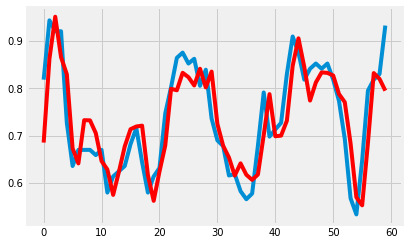

In [104]:
# train autoregression
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params

# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show();

## A simple moving average

A naive and effective technique in time series forecasting.

predicted=0.893667, expected=0.920000
predicted=0.927667, expected=0.727000
predicted=0.855667, expected=0.636000
predicted=0.761000, expected=0.670000
predicted=0.677667, expected=0.670000
predicted=0.658667, expected=0.670000
predicted=0.670000, expected=0.659000
predicted=0.666333, expected=0.670000
predicted=0.666333, expected=0.580000
predicted=0.636333, expected=0.614000
predicted=0.621333, expected=0.625000
predicted=0.606333, expected=0.636000
predicted=0.625000, expected=0.682000
predicted=0.647667, expected=0.716000
predicted=0.678000, expected=0.644000
predicted=0.680667, expected=0.580000
predicted=0.646667, expected=0.614000
predicted=0.612667, expected=0.632000
predicted=0.608667, expected=0.747000
predicted=0.664333, expected=0.802000
predicted=0.727000, expected=0.864000
predicted=0.804333, expected=0.875000
predicted=0.847000, expected=0.852000
predicted=0.863667, expected=0.862000
predicted=0.863000, expected=0.805000
predicted=0.839667, expected=0.839000
predicted=0.

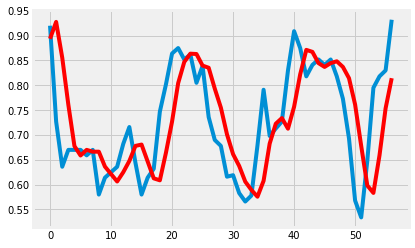

In [105]:
window = 3
history = [test[i] for i in range(window)]
test = [test[i] for i in range(window, len(test))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = np.mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show();

## Autoregressive Moving Average (ARMA)

It combines both Autoregression (AR) and Moving Average (MA) models. This method is suitable for univariate time series without trend and seasonal components.

In [106]:
X = df['OCC %']
X = X.values
train, test = X[0:len(X)-60], X[len(X)-60:]

predicted=0.656697, expected=0.818000
predicted=0.829180, expected=0.943000
predicted=0.928084, expected=0.920000
predicted=0.885660, expected=0.920000
predicted=0.887260, expected=0.727000
predicted=0.698808, expected=0.636000
predicted=0.637418, expected=0.670000
predicted=0.686398, expected=0.670000
predicted=0.682877, expected=0.670000
predicted=0.682548, expected=0.659000
predicted=0.671757, expected=0.670000
predicted=0.684077, expected=0.580000
predicted=0.594664, expected=0.614000
predicted=0.640697, expected=0.625000
predicted=0.647681, expected=0.636000
predicted=0.656482, expected=0.682000
predicted=0.699656, expected=0.716000
predicted=0.726096, expected=0.644000
predicted=0.650266, expected=0.580000
predicted=0.597542, expected=0.614000
predicted=0.640866, expected=0.632000
predicted=0.654407, expected=0.747000
predicted=0.763871, expected=0.802000
predicted=0.800775, expected=0.864000
predicted=0.851971, expected=0.875000
predicted=0.852892, expected=0.852000
predicted=0.

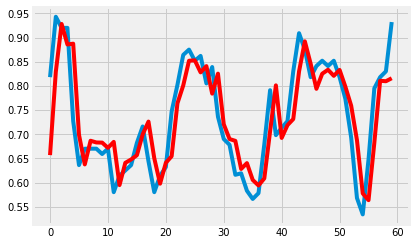

In [107]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARMA(history, order=(2,1))
    model_fit = model.fit(disp=False)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show();

## Autoregressive Integrated Moving Average (ARIMA)

It combines both Autoregression (AR) and Moving Average (MA) models as well as a differencing pre-processing step of the sequence to make the sequence stationary. The method is suitable for univariate time series with trend and without seasonal components.

predicted=0.661072, expected=0.818000
predicted=0.857929, expected=0.943000
predicted=0.958097, expected=0.920000
predicted=0.895571, expected=0.920000
predicted=0.869347, expected=0.727000
predicted=0.686595, expected=0.636000
predicted=0.644480, expected=0.670000
predicted=0.709980, expected=0.670000
predicted=0.724445, expected=0.670000
predicted=0.702471, expected=0.659000
predicted=0.659471, expected=0.670000
predicted=0.667571, expected=0.580000
predicted=0.580179, expected=0.614000
predicted=0.621749, expected=0.625000
predicted=0.634690, expected=0.636000
predicted=0.648419, expected=0.682000
predicted=0.680008, expected=0.716000
predicted=0.704893, expected=0.644000
predicted=0.630091, expected=0.580000
predicted=0.568743, expected=0.614000
predicted=0.618522, expected=0.632000
predicted=0.651808, expected=0.747000
predicted=0.761222, expected=0.802000
predicted=0.788246, expected=0.864000
predicted=0.834545, expected=0.875000
predicted=0.834278, expected=0.852000
predicted=0.

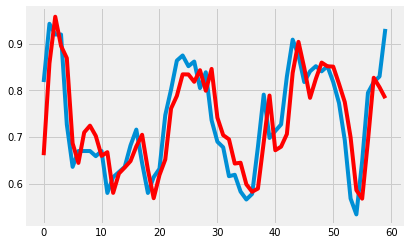

In [108]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show();

## Seasonal Autoregressive Integrated Moving-Average (SARIMA)

It combines the ARIMA model with the ability to perform the same autoregression, differencing, and moving average modeling at the seasonal level. The method is suitable for univariate time series with trend and/or seasonal components.

predicted=0.664553, expected=0.818000
predicted=0.849700, expected=0.943000
predicted=0.935625, expected=0.920000
predicted=0.881698, expected=0.920000
predicted=0.888831, expected=0.727000
predicted=0.691905, expected=0.636000
predicted=0.646925, expected=0.670000
predicted=0.703750, expected=0.670000
predicted=0.694098, expected=0.670000
predicted=0.693124, expected=0.659000
predicted=0.680996, expected=0.670000
predicted=0.694095, expected=0.580000
predicted=0.597804, expected=0.614000
predicted=0.654014, expected=0.625000
predicted=0.655321, expected=0.636000
predicted=0.662620, expected=0.682000
predicted=0.706108, expected=0.716000
predicted=0.728814, expected=0.644000
predicted=0.645746, expected=0.580000
predicted=0.597113, expected=0.614000
predicted=0.646969, expected=0.632000
predicted=0.655632, expected=0.747000
predicted=0.768729, expected=0.802000
predicted=0.796276, expected=0.864000
predicted=0.847116, expected=0.875000
predicted=0.843849, expected=0.852000
predicted=0.

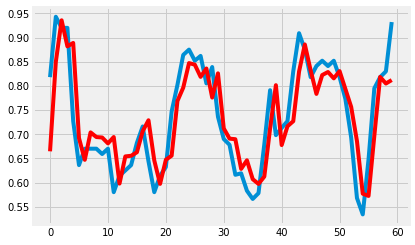

In [109]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = SARIMAX(history, order=(1, 1, 1), seasonal_order=(1, 1, 1, 1))
    model_fit = model.fit(disp=False)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show();

## Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX)

predicted=0.661637, expected=0.818000
predicted=0.805539, expected=0.943000
predicted=0.911428, expected=0.920000
predicted=0.891993, expected=0.920000
predicted=0.892059, expected=0.727000
predicted=0.728621, expected=0.636000
predicted=0.651661, expected=0.670000
predicted=0.680408, expected=0.670000
predicted=0.680395, expected=0.670000
predicted=0.680387, expected=0.659000
predicted=0.671071, expected=0.670000
predicted=0.680364, expected=0.580000
predicted=0.604190, expected=0.614000
predicted=0.632945, expected=0.625000
predicted=0.642233, expected=0.636000
predicted=0.651520, expected=0.682000
predicted=0.690435, expected=0.716000
predicted=0.719191, expected=0.644000
predicted=0.658280, expected=0.580000
predicted=0.604077, expected=0.614000
predicted=0.632839, expected=0.632000
predicted=0.648055, expected=0.747000
predicted=0.745350, expected=0.802000
predicted=0.791867, expected=0.864000
predicted=0.844338, expected=0.875000
predicted=0.853684, expected=0.852000
predicted=0.

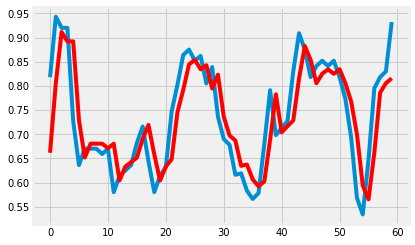

In [110]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = SARIMAX(history, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0), enforce_stationarity=False,
                                            enforce_invertibility=False)
    model_fit = model.fit(disp=False)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show();

## Vector Autoregression Moving-Average (VARMA)

The Vector Autoregression Moving-Average (VARMA) method models the next step in each time series using an ARMA model. It is the generalization of ARMA to multiple parallel time series, e.g. multivariate time series. So we will forecast both occupancy and revenue. The MSE is computed based on both.

                            Statespace Model Results                            
Dep. Variable:     ['OCC %', 'REVENUE']   No. Observations:                 1310
Model:                       VARMA(2,1)   Log Likelihood              -10598.506
                            + intercept   AIC                          21231.012
Date:                  Tue, 27 Aug 2019   BIC                          21319.034
Time:                          03:49:35   HQIC                         21264.026
Sample:                               0                                         
                                 - 1310                                         
Covariance Type:                    opg                                         
Ljung-Box (Q):               319.65, 64.70   Jarque-Bera (JB):      32.54, 10244.70
Prob(Q):                        0.00, 0.01   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.17, 2.60   Skew:                     -0.14, -0.69
Prob(H) (two-sided)

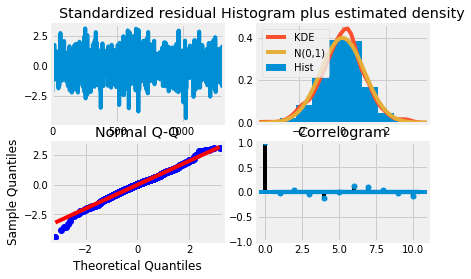

In [111]:
train_data = df[['OCC %', 'REVENUE']]
model = sm.tsa.VARMAX(train_data,order=(2,1),trend='c')
model_fitted = model.fit(maxiter=1000,disp=False)
print(model_fitted.summary())
predicted_result = model_fitted.predict(start=1251, end=1310)
model_fitted.plot_diagnostics()
# calculating error
error = mean_squared_error(train_data.iloc[1250:1310].values, predicted_result.values)
print("The mse is {}.".format(error))

## Prophet

Borrow EC's original code. With Hurricane season and outliers removed, the MSE is smaller.

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<Figure size 720x360 with 0 Axes>

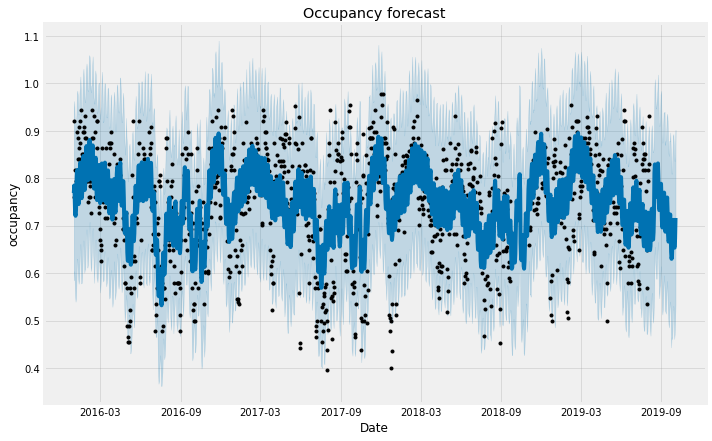

In [113]:
def is_hurricane_season(ds):    
    date = pd.to_datetime(ds)
    starts = datetime.date(date.year, 8, 15)
    ends = datetime.date(date.year, 10, 15)
    return starts < date.to_pydatetime().date() < ends

df.reset_index(inplace=True)
occ = df[['DATE', 'OCC %']]
occ = occ.rename(columns = {'DATE': 'ds', 'OCC %': 'y'})
occ['hurricane_season'] = occ['ds'].apply(is_hurricane_season)
occ['not_hurricane_season'] = ~occ['ds'].apply(is_hurricane_season)
model = Prophet(interval_width=0.95)
# Remove outliers in Oct
occ.loc[(occ['ds'] > '2018-09-24') & (occ['ds'] < '2018-11-04'), 'y'] = None
# Add hurricane
model.add_seasonality(name='hurricane_season', period=365, fourier_order=10, condition_name='hurricane_season')
model.add_seasonality(name='not_hurricane_season', period=365, fourier_order=10, condition_name='not_hurricane_season')
model.fit(occ)
forecast = model.make_future_dataframe(periods=60, freq='D')
forecast['hurricane_season'] = forecast['ds'].apply(is_hurricane_season)
forecast['not_hurricane_season'] = ~forecast['ds'].apply(is_hurricane_season)

forecast = model.predict(forecast)
plt.figure(figsize=(10, 5))
model.plot(forecast, xlabel = 'Date', ylabel = 'occupancy')
plt.title('Occupancy forecast');

In [114]:
metric_df = forecast.set_index('ds')[['yhat']].join(occ.set_index('ds').y).reset_index()
metric_df.dropna(inplace=True)
error = mean_squared_error(metric_df.y, metric_df.yhat)
print('The MSE is {}'. format(error))

The MSE is 0.00847604458358699


## Simple Exponential Smoothing (SES)

This method is suitable for univariate time series without trend and seasonal components.

In [30]:
pd.plotting.register_matplotlib_converters()

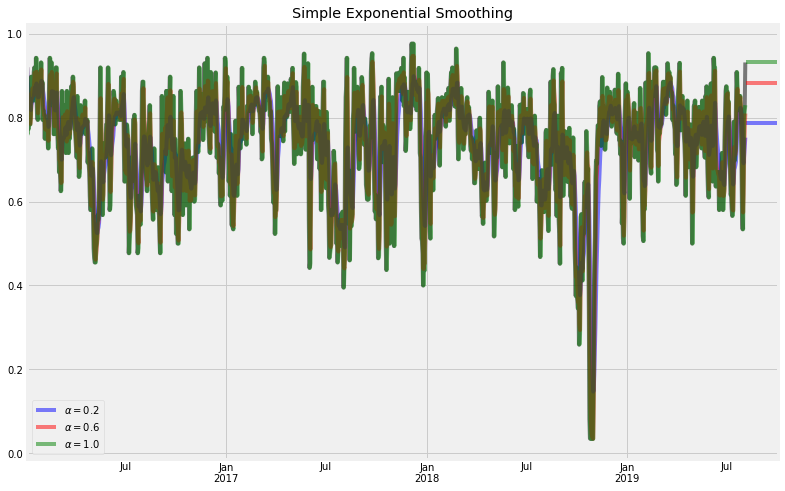

In [123]:
df.set_index('DATE', inplace=True)
occ_data = df['OCC %']
data = occ_data.values
index= pd.date_range(start='2016-01-3', end='2019-08-04')
occ_data = pd.Series(data, index)

fit1 = SimpleExpSmoothing(occ_data).fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(60).rename(r'$\alpha=0.2$')
fit2 = SimpleExpSmoothing(occ_data).fit(smoothing_level=0.6,optimized=False)
fcast2 = fit2.forecast(60).rename(r'$\alpha=0.6$')
fit3 = SimpleExpSmoothing(occ_data).fit()
fcast3 = fit3.forecast(60).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])

ax = occ_data.plot(color='black', figsize=(12,8), alpha=0.5)
fcast1.plot(ax=ax, color='blue', legend=True, alpha=0.5)
fit1.fittedvalues.plot(ax=ax, color='blue', alpha=0.5)
fcast2.plot(ax=ax, color='red', legend=True, alpha=0.5)

fit2.fittedvalues.plot(ax=ax, color='red', alpha=0.5)
fcast3.plot(ax=ax, color='green', legend=True, alpha=0.5)
fit3.fittedvalues.plot(ax=ax, color='green', alpha=0.5)
plt.title("Simple Exponential Smoothing")
plt.show();

This looks so bad. The simple model from the [tutorial](https://www.statsmodels.org/dev/examples/notebooks/generated/exponential_smoothing.html) looks bad too.

## Holt Winter’s Exponential Smoothing (HWES)

This method is suitable for univariate time series with trend and/or seasonal components.

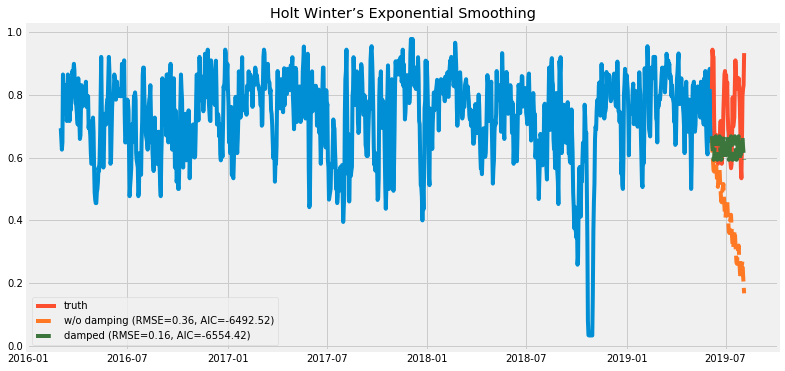

In [121]:
df.reset_index(inplace=True)
df1 = df[['DATE', 'OCC %']]
df1.set_index('DATE', inplace=True)
train = df1.iloc[0:-60, :]
test = df1.iloc[-60:, :]

model = ExponentialSmoothing(train, trend="add", seasonal_periods=7, seasonal='add')
model2 = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=7, damped=True)
fit = model.fit()
pred = fit.forecast(60)
fit2 = model2.fit()
pred2 = fit2.forecast(60)

sse1 = np.sqrt(np.mean(np.square(test.values - pred.values)))
sse2 = np.sqrt(np.mean(np.square(test.values - pred2.values)))

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train.index[60:], train.values[60:]);
ax.plot(test.index, test.values, label='truth');
ax.plot(test.index, pred, linestyle='--', color='#ff7823', label="w/o damping (RMSE={:0.2f}, AIC={:0.2f})".format(sse1, fit.aic));
ax.plot(test.index, pred2, linestyle='--', color='#3c763d', label="damped (RMSE={:0.2f}, AIC={:0.2f})".format(sse2, fit2.aic)); 
ax.legend();
ax.set_title("Holt Winter’s Exponential Smoothing");

References:

[11 Classical Time Series Forecasting Methods in Python (Cheat Sheet)](https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/)

[Exponential smoothing tutorial](https://www.statsmodels.org/dev/examples/notebooks/generated/exponential_smoothing.html)

[Time Series analysis tsa](http://www.statsmodels.org/dev/tsa.html)

[Autoregression Models for Time Series Forecasting With Python](https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/)